# Introduction Forecasting with State Space Models (Unobserved Components)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.tsa.statespace.structural import UnobservedComponents
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

%reload_ext autoreload
%autoreload 2

In [2]:
min_date = pd.to_datetime('2019-01-01')
max_date = pd.to_datetime('2022-01-01')

data_df = pd.DataFrame(
    data={'date': pd.date_range(start=min_date, end=max_date, freq='W-MON')}
)

n = data_df.shape[0]


In [21]:
def generate_data(n, params):
    
    y = np.zeros(n)
    mu = np.zeros(n)
    beta = np.zeros(n)
    epsilon = np.zeros(n)
    eta = np.zeros(n)
    zeta = np.zeros(n)

    for t in range(1, n):
        
        zeta[t] = params['zeta'] * np.random.normal(loc=0.0, scale=0.2)
        beta[t] = params['beta_1'] * beta[t - 1] + zeta[t]
        
        eta[t] = params['eta'] * np.random.normal(loc=0.0, scale=0.2)
        mu[t] = params['mu_1'] * mu[t -1] + params['beta_1'] * beta[t - 1] + eta[t]

        epsilon[t] = params['epsilon'] * np.random.normal(loc=0.0, scale=0.2)
        y[t] = params['mu'] * mu[t] + epsilon[t]

    return y, mu, beta

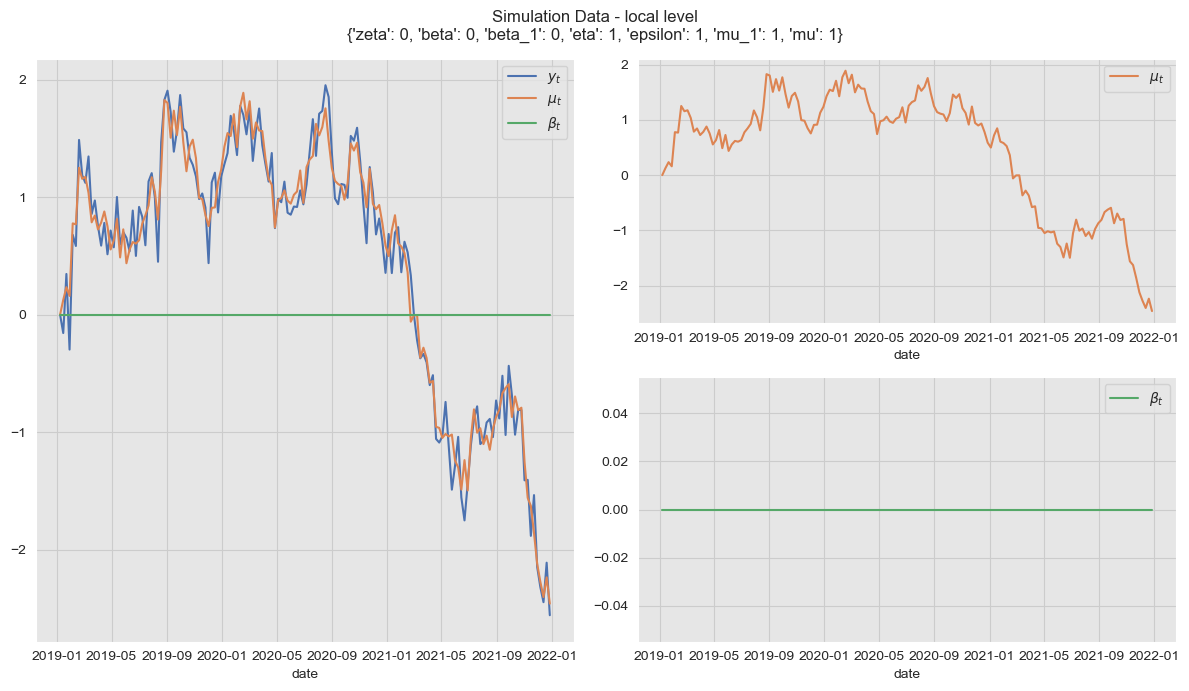

In [36]:
from mapping import PARAMS

model_names = list(PARAMS.keys())

model_name = model_names[2]
params = PARAMS.get(model_name, 'irregular')

y, mu, beta = generate_data(n=n, params=params)

fig = plt.figure(figsize=(12, 7), tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[:, 0])
sns.lineplot(x=data_df['date'], y=y, color=sns_c[0], label=r'$y_t$', ax=ax)
sns.lineplot(x=data_df['date'], y=mu, color=sns_c[1], label=r'$\mu_t$', ax=ax)
sns.lineplot(x=data_df['date'], y=beta, color=sns_c[2], label=r'$\beta_t$', ax=ax)

ax0 = fig.add_subplot(gs[0, 1])
sns.lineplot(x=data_df['date'], y=mu, color=sns_c[1], label=r'$\mu_t$', ax=ax0)

ax1 = fig.add_subplot(gs[1, 1])
sns.lineplot(x=data_df['date'], y=beta, color=sns_c[2], label=r'$\beta_t$', ax=ax1)

fig.suptitle(f'Simulation Data - {model_name}\n{params}');